# String matching of full names
> 1. Load data with full names
> 2. Perform string matching using fuzzywuzzy

In [1]:
import sys
sys.path.insert(0, '/healthcare-fraud/src/')
import scripts as src
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
!pip install tqdm
from tqdm import tqdm_notebook
import time
from itertools import product
%matplotlib inline

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# load data
LEIE_id_full = src.read_from_efs('LEIE_id_full.csv')
PartD_id_full = src.read_from_efs('PartD_id_full.csv')
print('LEIE_id_full shape: %s, PartD_id_full shape: %s' %(LEIE_id_full.shape, PartD_id_full.shape))

LEIE_id_full shape: (14967, 7), PartD_id_full shape: (1294850, 8)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
cities = list(set(LEIE_id_full['city']).intersection(set(PartD_id_full['city'])))
print('Number of cities common to LEIE and PartD: %d' %len(cities))

Number of cities common to LEIE and PartD: 3723


In [4]:
def build_pairs(city):
    LEIE_names = LEIE_id_full['full'][LEIE_id_full['city'] == city]
    PartD_names = PartD_id_full['full'][PartD_id_full['city'] == city]
    return list(product(LEIE_names, PartD_names))

In [5]:
print("Number of available CPU cores: ")
!cat /proc/cpuinfo | grep processor | wc -l

Number of available CPU cores: 
64


In [39]:
# Build string pairs in parallel using multi-processing
if __name__ == '__main__':
    tasks = cities
    function = build_pairs
    with Pool(processes=64)as p:
        pairs = list(tqdm_notebook(p.imap(function, tasks), total=len(tasks)))

In [41]:
# make a dictionary before converting
city_pairs_dict = {}
for i, city in enumerate(cities):
    city_pairs_dict[city] = pairs[i]

# unpack name pairs
pairs = []
for city in cities:
    pairs += city_pairs_dict[city]
print('There are %s million pairs!' %round(len(pairs)/1000000,1))

There are 26.0 million pairs!


## String matching using Fuzzywuzzy
---

In [42]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def get_fuzz_scores(str_pair):
    str_a = str_pair[0]
    str_b = str_pair[1]
    fuzz_scores = [fuzz.QRatio(str_a,str_b),
                   fuzz.UQRatio(str_a,str_b),
                   fuzz.UWRatio(str_a,str_b),
                   fuzz.WRatio(str_a,str_b),                        
                   fuzz.partial_ratio(str_a,str_b),
                   fuzz.partial_token_sort_ratio(str_a,str_b),                  
                   fuzz.token_set_ratio(str_a,str_b),
                   fuzz.token_sort_ratio(str_a,str_b)]
    return fuzz_scores

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
# Get fuzzy wuzzy scores in parallel using multi-processing
if __name__ == '__main__':
    tasks = pairs
    function = get_fuzz_scores
    with Pool(processes=64)as p:
        fuzz_scores = list(tqdm_notebook(p.imap(function, tasks), total=len(tasks)))

Process ForkPoolWorker-636:
Process ForkPoolWorker-663:
Process ForkPoolWorker-656:
Process ForkPoolWorker-667:
Process ForkPoolWorker-680:
Process ForkPoolWorker-649:
Process ForkPoolWorker-642:
Process ForkPoolWorker-662:
Process ForkPoolWorker-654:
Process ForkPoolWorker-635:
Process ForkPoolWorker-661:
Process ForkPoolWorker-618:
Process ForkPoolWorker-648:
Process ForkPoolWorker-651:
Process ForkPoolWorker-658:
Process ForkPoolWorker-670:
Process ForkPoolWorker-634:
Process ForkPoolWorker-637:
Process ForkPoolWorker-619:
Process ForkPoolWorker-653:
Process ForkPoolWorker-676:
Process ForkPoolWorker-677:
Process ForkPoolWorker-628:
Process ForkPoolWorker-655:
Process ForkPoolWorker-679:
Process ForkPoolWorker-666:
Process ForkPoolWorker-640:
Process ForkPoolWorker-632:
Process ForkPoolWorker-630:
Process ForkPoolWorker-669:
Process ForkPoolWorker-646:
Process ForkPoolWorker-621:
Process ForkPoolWorker-629:
Process ForkPoolWorker-657:
Process ForkPoolWorker-625:
Process ForkPoolWork

  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 258, in _b

  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/process.py", line 

  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result =

  File "<ipython-input-42-d604dbbefa61>", line 12, in get_fuzz_scores
    fuzz.partial_token_sort_ratio(str_a,str_b),
  File "<ipython-input-42-d604dbbefa61>", line 13, in get_fuzz_scores
    fuzz.token_set_ratio(str_a,str_b),
  File "<ipython-input-42-d604dbbefa61>", line 12, in get_fuzz_scores
    fuzz.partial_token_sort_ratio(str_a,str_b),
  File "<ipython-input-42-d604dbbefa61>", line 9, in get_fuzz_scores
    fuzz.UWRatio(str_a,str_b),
  File "<ipython-input-42-d604dbbefa61>", line 11, in get_fuzz_scores
    fuzz.partial_ratio(str_a,str_b),
  File "<ipython-input-42-d604dbbefa61>", line 12, in get_fuzz_scores
    fuzz.partial_token_sort_ratio(str_a,str_b),
  File "<ipython-input-42-d604dbbefa61>", line 12, in get_fuzz_scores
    fuzz.partial_token_sort_ratio(str_a,str_b),
  File "<ipython-input-42-d604dbbefa61>", line 12, in get_fuzz_scores
    fuzz.partial_token_sort_ratio(str_a,str_b),
  File "<ipython-input-42-d604dbbefa61>", line 9, in get_fuzz_scores
    fuzz.UWRatio(str_a,st

  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py", line 188, in token_set_ratio
    return _token_set(s1, s2, partial=False, force_ascii=force_ascii, full_process=full_process)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py", line 134, in partial_token_sort_ratio
    return _token_sort(s1, s2, partial=True, force_ascii=force_ascii, full_process=full_process)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py", line 325, in UWRatio
    return WRatio(s1, s2, force_ascii=False, full_process=full_process)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 29, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py", line 134, in partial_token_sort_ratio
    return _token_sort(s1, s2, partial=True, force_ascii=force_ascii, full_pr

  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 29, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 38, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py", line 127, in token_sort_ratio
    return _token_sort(s1, s2, partial=False, force_ascii=force_ascii, full_process=full_process)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py", line 226, in QRatio
    return ratio(p1, p2)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 29, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 29, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/

  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 29, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py", line 226, in QRatio
    return ratio(p1, p2)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 29, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py", line 192, in partial_token_set_ratio
    return _token_set(s1, s2, partial=True, force_ascii=force_ascii, full_process=full_process)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 38, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fuzzywuzzy/utils.py", line 38, in decorator
    return func(*args, **kwargs)
  File "/home/ec2-user/anaco

KeyboardInterrupt: 

In [ ]:
# create pandas dataframe for fuzz scores
s_time = time.time()
columns = ['Qratio','UQratio','UWQratio','UWQratio','partial_ratio','partial_token_sort_ratio','token_set_ratio','token_sort_ratio']
fuzz_scores_df = pd.DataFrame(data = fuzz_scores, index=None, columns=columns)

# add names from LEIE and Part
fuzz_scores_df['LEIE'] = np.array(pairs).T[0]
fuzz_scores_df['PartD'] = np.array(pairs).T[1]

# save to efs
src.save_to_efs(fuzz_scores_df, 'fuzz_scores_df.csv')
e_time = time.time()
e_time - s_time

# save to efs
src.save_to_efs(fuzz_scores_df, 'fuzz_scores_df.csv')
e_time = time.time()
e_time - s_time

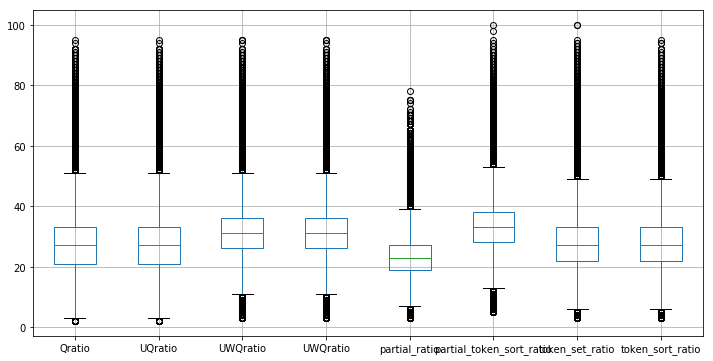

In [32]:
fuzz_scores_df.boxplot(figsize=(12,6))
plt.show()